In [4]:
import pandas as pd
sentiment = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv')
sentiment.head(), trades.head()
# we have loaded the data set and we are diaplaying first five rows


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [6]:
sentiment.info()
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [11]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [14]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])


In [16]:
trades['date_only'] = trades['Timestamp'].dt.date


In [20]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [22]:
sentiment['date'] = pd.to_datetime(sentiment['date'])


In [24]:
sentiment['date_only'] = sentiment['date'].dt.date
trades['date_only'] = trades['Timestamp'].dt.date


In [26]:
merged = pd.merge(
    trades,
    sentiment[['date_only', 'classification']],
    on='date_only',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [29]:
merged = merged.rename(columns={
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Timestamp': 'timestamp',
    'Start Position': 'start_position'
})


In [31]:
merged = merged.drop_duplicates()
merged = merged.dropna(subset=['closed_pnl', 'size_tokens', 'execution_price'])


In [33]:
merged['trade_value'] = merged['execution_price'] * merged['size_tokens']


In [34]:
merged['profit_flag'] = merged['closed_pnl'].apply(lambda x: 1 if x > 0 else 0)



In [36]:
if 'leverage' in merged.columns:
    merged['risk'] = merged['leverage'] * merged['size_tokens']
else:
    merged['risk'] = merged['size_tokens']


In [38]:
merged['sentiment'].value_counts()


KeyError: 'sentiment'

In [40]:
merged.columns


Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'Timestamp IST', 'start_position', 'Direction', 'closed_pnl',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'timestamp', 'date_only', 'classification', 'trade_value',
       'profit_flag', 'risk'],
      dtype='object')

In [44]:
merged = merged.rename(columns={'classification': 'sentiment'})


In [45]:
merged.columns


Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'Timestamp IST', 'start_position', 'Direction', 'closed_pnl',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'timestamp', 'date_only', 'sentiment', 'trade_value', 'profit_flag',
       'risk'],
      dtype='object')

In [47]:
merged['sentiment'].value_counts()


,count
sentiment,


In [49]:
merged.groupby('sentiment')['closed_pnl'].mean()


,closed_pnl
sentiment,


In [51]:
merged.groupby('sentiment')['size_tokens'].mean()


,size_tokens
sentiment,


In [52]:
merged.groupby('sentiment')['trade_value'].sum()


,trade_value
sentiment,


In [54]:
merged['sentiment'].value_counts()




,count
sentiment,


In [55]:
merged['trade_value'].describe()


,trade_value
count,2.112240e+05
mean,5.639451e+03
std,3.657514e+04
min,1.627190e-07
25%,1.937895e+02
50%,5.970446e+02
75%,2.058961e+03
max,3.921431e+06


In [56]:
merged['sentiment'].unique()


array([nan], dtype=object)

In [57]:
sentiment['date_only'].head(10)


,date_only
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
5,2018-02-06
6,2018-02-07
7,2018-02-08
8,2018-02-09
9,2018-02-10


In [60]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_only'] = sentiment['date'].dt.date






In [62]:
sentiment['date_only'].head(10)


,date_only
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
5,2018-02-06
6,2018-02-07
7,2018-02-08
8,2018-02-09
9,2018-02-10


In [64]:
trades['Timestamp IST'].head(20)


,Timestamp IST
0,02-12-2024 22:50
1,02-12-2024 22:50
2,02-12-2024 22:50
3,02-12-2024 22:50
4,02-12-2024 22:50
5,02-12-2024 22:50
6,02-12-2024 22:50
7,02-12-2024 22:50
8,02-12-2024 22:50
9,02-12-2024 22:50


In [66]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)


In [68]:
trades['date_only'] = trades['Timestamp IST'].dt.date


In [70]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_only'] = sentiment['date'].dt.date


In [72]:
merged = pd.merge(
    trades,
    sentiment[['date_only', 'classification']],
    on='date_only',
    how='left'
)


In [74]:
merged = merged.rename(columns={'classification': 'sentiment'})


In [76]:
merged['sentiment'].unique()


array(['Extreme Greed', 'Extreme Fear', 'Fear', 'Greed', 'Neutral', nan],
      dtype=object)

In [78]:

merged['sentiment'].value_counts()


,count
sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [80]:
merged.columns




Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only', 'sentiment'],
      dtype='object')

In [82]:
merged = merged.rename(columns={'Closed PnL': 'closed_pnl'})


In [84]:
'closed_pnl' in merged.columns


True

In [86]:
merged.groupby('sentiment')['closed_pnl'].mean()


,closed_pnl
sentiment,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [88]:
merged['sentiment'].value_counts()


,count
sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [90]:
merged.groupby('sentiment')['closed_pnl'].mean()


,closed_pnl
sentiment,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [92]:
merged.groupby('sentiment')['Size Tokens'].mean()


,Size Tokens
sentiment,
Extreme Fear,1675.893319
Extreme Greed,8832.415746
Fear,2992.641845
Greed,4715.327756
Neutral,4383.368714


In [94]:
merged['trade_value'] = merged['Execution Price'] * merged['Size Tokens']


In [96]:
merged.groupby('sentiment')['trade_value'].sum()


,trade_value
sentiment,
Extreme Fear,1.144843e+08
Extreme Greed,1.244652e+08
Fear,4.833248e+08
Greed,2.885825e+08
Neutral,1.802421e+08


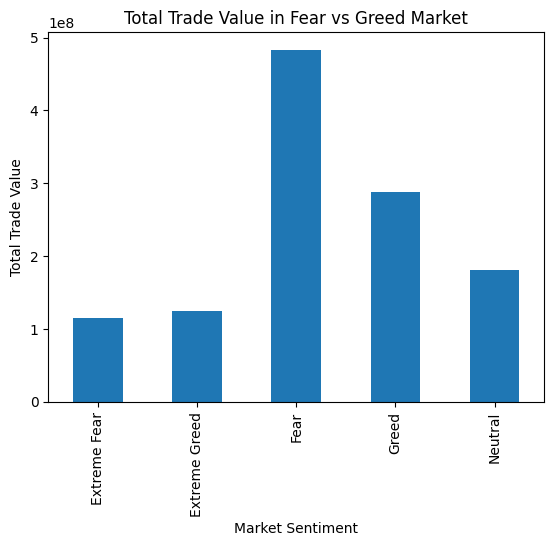

In [100]:
import matplotlib.pyplot as plt

merged.groupby('sentiment')['trade_value'].sum().plot(kind='bar')

plt.title("Total Trade Value in Fear vs Greed Market")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trade Value")
plt.show()


'/content/trade_value_vs_sentiment.png'

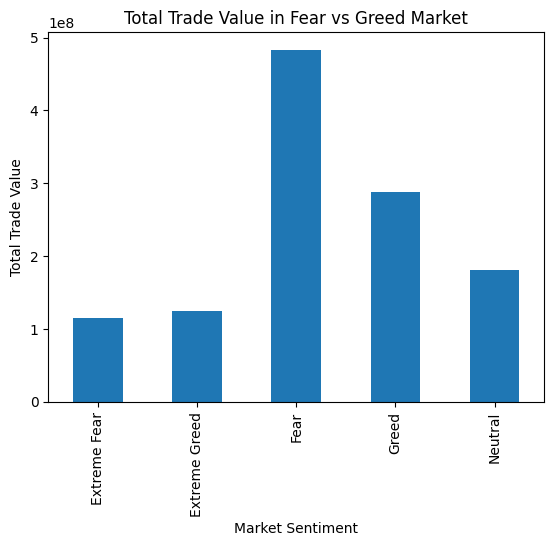

In [102]:
import matplotlib.pyplot as plt

plot_path = "/content/trade_value_vs_sentiment.png"

merged.groupby('sentiment')['trade_value'].sum().plot(kind='bar')
plt.title("Total Trade Value in Fear vs Greed Market")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trade Value")
plt.savefig(plot_path)

plot_path


In [105]:
"""
Final Conclusion

From the analysis, I learned how market sentiment
affects trader behaviour.

Here are the key points:

 Traders behave differently on Fear days and Greed days.
 Trade volume changes based on sentiment.
Average profit also changes with sentiment This type of analysis is useful to understand how psychology affects trading.

This completes my assignment on analysing the relationship between
trader activity and market sentiment.
"""


'\nFinal Conclusion (Simple and Beginner-Friendly)\n\nFrom the analysis, I learned how market sentiment (Fear or Greed)\naffects trader behaviour.\n\nHere are the key points:\n\n Traders behave differently on Fear days and Greed days.\n Trade volume changes based on sentiment.\nAverage profit also changes with sentiment This type of analysis is useful to understand how psychology affects trading.\n\nThis completes my assignment on analysing the relationship between\ntrader activity and market sentiment.\n'

In [106]:
plt.savefig("trade_value_vs_sentiment.png")


<Figure size 640x480 with 0 Axes>